In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../output/status_sources.csv')
df.head()

,SERVICE,NOTE,SELF_STATUS_PAGE,SELF_STATUS_SOURCE,USER_SOURCES,ALEXA_POS,MOZ_POS,RANKRANGER_POS,AHREFS_POS,SIMILARWEB_ALL,SIMILARWEB_POS_CAT1,SIMILARWEB_POS_CAT2
0,Lyft,NaN,N,-,"0,1,2,3",NaN,NaN,NaN,NaN,NaN,"46 travel-and-tourism,health",46 health
1,Facebook Messenger,NaN,Y,facebook,"0,4,5,3,6,1",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trello,NaN,Y,statuspage,"0,7,5,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Netflix,NaN,Y,netflix,"0,5,4,10,1,9",20.0,195.0,30.0,14.0,16.0,2 arts-and-entertainment,NaN
4,Facebook,NaN,Y,facebook,"0,7,10,5,4,3,1",6.0,31.0,2.0,2.0,3.0,2 computers-electronics-and-technology,NaN


### Third-party sources of information (all services)

In [3]:
# count occurrences of third-party sources (tps) for all services
# Google query (1st page): <SERVICE> service status
tps_counts = {}
for sources in df['USER_SOURCES']:
    try: # some do not have user-sources of data
        for tps in sources.split(','):
            if tps not in tps_counts.keys():
                tps_counts.update({tps : 1})
            else:
                tps_counts[tps] += 1
    except:
        pass
print(tps_counts)

{'0': 35, '1': 16, '2': 6, '3': 15, '4': 19, '5': 33, '6': 1, '7': 11, '10': 14, '9': 1, '11': 5, '13': 2, '14': 2, '15': 1, '16': 2, '17': 1, '18': 1}


In [4]:
# update the key names to the actual third party source
new_keys = [['downdetector','0'],['servicesdown','1'],['updownradar','2'],['outage.report','3'],['istheservicedown','4'],['isitdownrightnow','5'],['downhunter','6'],['statusgator','7'],['netflixdown','9'],['downrightnow','10'],['downforeveryoneorjustme','11'],['isdown.app','13'],['uptime','14'],['updownreport','15'],['cloudharmony','16'],['downinspector','17'],['statusticker','18']]
for entry in new_keys:
    tps_counts[entry[0]] = tps_counts.pop(entry[1])
tps_counts = dict(sorted(tps_counts.items(), key=lambda item: item[1], reverse=True))
print(tps_counts)

{'downdetector': 35, 'isitdownrightnow': 33, 'istheservicedown': 19, 'servicesdown': 16, 'outage.report': 15, 'downrightnow': 14, 'statusgator': 11, 'updownradar': 6, 'downforeveryoneorjustme': 5, 'isdown.app': 2, 'uptime': 2, 'cloudharmony': 2, 'downhunter': 1, 'netflixdown': 1, 'updownreport': 1, 'downinspector': 1, 'statusticker': 1}


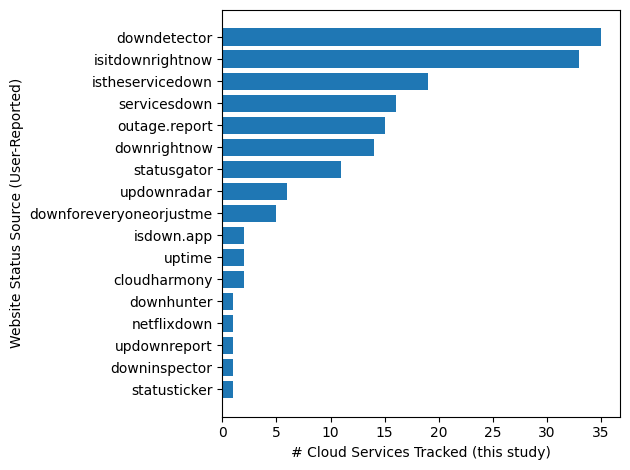

In [5]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(range(len(tps_counts)), list(tps_counts.values()), align='center')
plt.yticks(range(len(tps_counts)), list(tps_counts.keys()))
ax.invert_yaxis()
# plt.title("Third-Party Website Tracking for All Services")
plt.xlabel("# Cloud Services Tracked (this study)")
plt.ylabel("Website Status Source (User-Reported)")
plt.tight_layout()
plt.show()
fig.savefig('../output/plots/tps_all.png', dpi=fig.dpi)

### Third-party sources of information (individual services)

In [6]:
# count the number of third-party sources for each service
tps_per_service = {}
sources = df['USER_SOURCES'].values
for num, service in enumerate(df['SERVICE']):
    try: # some do not have user-sources of data
        tps_per_service.update({service : len(sources[num].split(','))})
    except:
        pass
tps_per_service = dict(sorted(tps_per_service.items(), key=lambda item: item[1], reverse=True))
print(len(tps_per_service), tps_per_service)

40 {'Facebook': 7, 'Facebook Messenger': 6, 'Netflix': 6, 'Twitter': 6, 'Yahoo! Mail': 6, 'Spotify': 6, 'Pinterest': 6, 'Paypal': 5, 'LinkedIn': 5, 'WhatsApp': 5, 'Zynga': 5, 'YouTube': 5, 'Gmail': 5, 'Amazon': 5, 'Instagram': 5, 'Lyft': 4, 'Trello': 4, 'Reddit': 4, 'Hotmail': 4, 'Ning': 4, 'Blogger': 4, 'Snapchat': 4, 'Typepad': 4, 'Skype': 4, 'Airbnb': 4, 'LiveJournal': 4, 'Cloudflare': 4, 'Nintendo': 4, 'Bitbucket': 3, 'Confluence': 3, 'Github': 3, 'Tumblr': 3, 'Foursquare': 3, 'Jira': 3, 'Minecraft': 3, 'Google': 3, 'Opsgenie': 2, 'Slack': 2, 'Apple': 1, 'Microsoft Azure': 1}


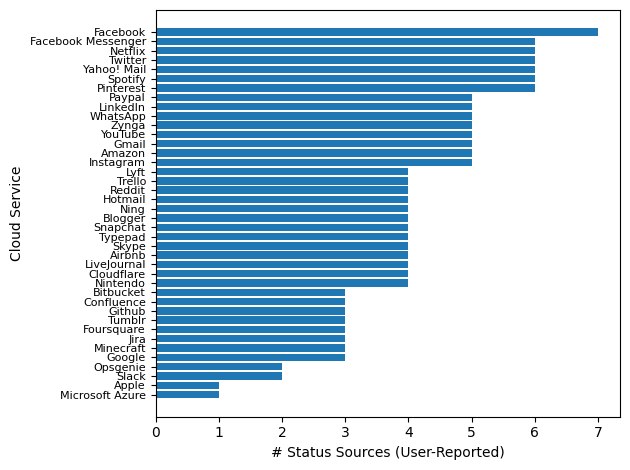

In [7]:
fig, ax = plt.subplots()
ax.barh(range(len(tps_per_service)), list(tps_per_service.values()), align='center')
plt.yticks(range(len(tps_per_service)), list(tps_per_service.keys()))
plt.tick_params(axis='y', which='major', labelsize=8)
ax.invert_yaxis()
# plt.title("Third-Party Website Tracking for Individual Services")
plt.xlabel("# Status Sources (User-Reported)")
plt.ylabel("Cloud Service")
plt.tight_layout()
plt.show()
fig.savefig('../output/plots/tps_individual.png', dpi=fig.dpi)

### Website rankings

In [8]:
df_ranks = df.iloc[:, 5:10].copy()
before = len(df_ranks)
df_ranks = df_ranks.set_index(df['SERVICE'])
df_ranks.columns = ['Alexa Top 50', 'Moz Top 500', 'RankRanger Top 100', 'Ahrefs Top 100', 'SimilarWeb Top 50']
df_ranks.dropna(how='all', inplace=True)
df_ranks = df_ranks.sort_values(by=['SERVICE'], ascending=True)
after = len(df_ranks)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_ranks.head()

Total services: 46
Services with ranking: 25
% Services with ranking: 54.347826086956516


,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
Airbnb,NaN,376.0,NaN,NaN,NaN
Amazon,11.0,25.0,3.0,6.0,13.0
Apple,NaN,3.0,6.0,23.0,NaN
Blogger,NaN,7.0,NaN,NaN,NaN
Cloudflare,NaN,4.0,NaN,NaN,NaN


<ipython-input-9-5035922c420e>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


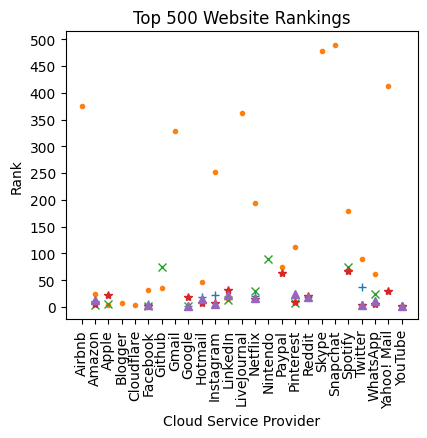

In [9]:
df_ranks.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_ranks.index)), df_ranks.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
ax.yaxis.set_ticks(np.arange(0, 510, 50))
plt.title("Top 500 Website Rankings")
plt.xlabel("Cloud Service Provider")
plt.ylabel("Rank")
plt.subplots_adjust(left=0.1, right=.65, bottom=0.3, top=0.9)
plt.savefig('../output/plots/top_500.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

In [10]:
# lets plot only the top 100's
df_100 = df_ranks.apply(lambda x: [y if y <= 100 else np.nan for y in x])
df_100.dropna(how='all', inplace=True)
df_100 = df_100.sort_values(by=['SERVICE'], ascending=True)
after = len(df_100)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_100.head()

Total services: 46
Services with ranking: 20
% Services with ranking: 43.47826086956522


,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
Amazon,11.0,25.0,3.0,6.0,13.0
Apple,NaN,3.0,6.0,23.0,NaN
Blogger,NaN,7.0,NaN,NaN,NaN
Cloudflare,NaN,4.0,NaN,NaN,NaN
Facebook,6.0,31.0,2.0,2.0,3.0


<ipython-input-20-a5b59d085645>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


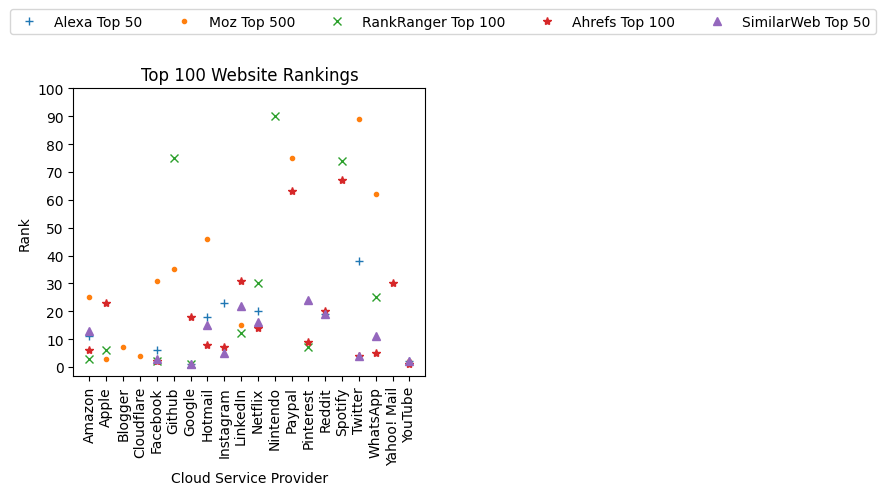

In [20]:
df_100.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_100.index)), df_100.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper left', bbox_to_anchor=(-.2, 1.3), ncol=5)
ax.yaxis.set_ticks(np.arange(0, 110, 10))
plt.title("Top 100 Website Rankings")
plt.xlabel("Cloud Service Provider")
plt.ylabel("Rank")
plt.subplots_adjust(left=0.1, right=.65, bottom=0.3, top=0.9)
plt.savefig('../output/plots/top_100.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

In [12]:
# lets plot only the top 100's
df_50 = df_ranks.apply(lambda x: [y if y <= 50 else np.nan for y in x])
df_50.dropna(how='all', inplace=True)
df_50 = df_50.sort_values(by=['SERVICE'], ascending=True)
after = len(df_50)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_50.head()

Total services: 46
Services with ranking: 17
% Services with ranking: 36.95652173913043


,Alexa Top 50,Moz Top 500,RankRanger Top 100,Ahrefs Top 100,SimilarWeb Top 50
SERVICE,,,,,
Amazon,11.0,25.0,3.0,6.0,13.0
Apple,NaN,3.0,6.0,23.0,NaN
Blogger,NaN,7.0,NaN,NaN,NaN
Cloudflare,NaN,4.0,NaN,NaN,NaN
Facebook,6.0,31.0,2.0,2.0,3.0


<ipython-input-13-4145c97a3acf>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


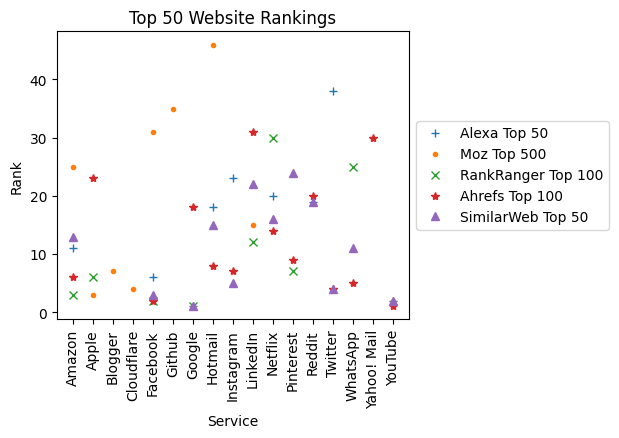

In [13]:
df_50.plot(style=['+','.','x','*','^'], linestyle='none')
ax = plt.subplot(111)
plt.xticks(range(len(df_50.index)), df_50.index, rotation=90)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Top 50 Website Rankings")
plt.xlabel("Service")
plt.ylabel("Rank")
plt.subplots_adjust(left=0.1, right=.65, bottom=0.3, top=0.9)
plt.savefig('../output/plots/top_50.png', dpi=fig.dpi)
plt.show()

### Website ranking per category

In [14]:
# TODO: cleanup --> this is a bit hacky
df_category = pd.DataFrame()
df_category['SERVICE'] = df['SERVICE'].copy()

rank_cat1 = np.array(df['SIMILARWEB_POS_CAT1'].copy())
rank = []
cat = []
for entry in rank_cat1:
    if entry is not np.nan:
        rank.append(entry.split()[0])
        cat.append(entry.split()[1])
    else:
        rank.append(np.nan)
        cat.append(np.nan)
df_category['RANK1'] = rank
df_category['CATEGORY1'] = cat

df_category = df_category[df_category['RANK1'].notna()]
df_category.RANK1 = df_category.RANK1.astype(int)
df_category = df_category.sort_values(by=['CATEGORY1','RANK1'], ascending=True)
after = len(df_category)
print('Total services: {}\nServices with ranking: {}\n% Services with ranking: {}'.format(before, after, after/before*100))
df_category.head(after)

Total services: 46
Services with ranking: 21
% Services with ranking: 45.65217391304348


,SERVICE,RANK1,CATEGORY1
25,YouTube,1,arts-and-entertainment
3,Netflix,2,arts-and-entertainment
28,Spotify,7,arts-and-entertainment
38,Google,1,computers-electronics-and-technology
4,Facebook,2,computers-electronics-and-technology
16,Twitter,3,computers-electronics-and-technology
33,Instagram,4,computers-electronics-and-technology
17,WhatsApp,7,computers-electronics-and-technology
6,Hotmail,9,computers-electronics-and-technology
5,Reddit,10,computers-electronics-and-technology


In [15]:
# this latex has since been modified (see next cell)...
print(df_category.to_latex(index=False))

\begin{tabular}{lrl}
\toprule
   SERVICE &  RANK1 &                             CATEGORY1 \\
\midrule
   YouTube &      1 &                arts-and-entertainment \\
   Netflix &      2 &                arts-and-entertainment \\
   Spotify &      7 &                arts-and-entertainment \\
    Google &      1 &  computers-electronics-and-technology \\
  Facebook &      2 &  computers-electronics-and-technology \\
   Twitter &      3 &  computers-electronics-and-technology \\
 Instagram &      4 &  computers-electronics-and-technology \\
  WhatsApp &      7 &  computers-electronics-and-technology \\
   Hotmail &      9 &  computers-electronics-and-technology \\
    Reddit &     10 &  computers-electronics-and-technology \\
  LinkedIn &     13 &  computers-electronics-and-technology \\
 Pinterest &     15 &  computers-electronics-and-technology \\
     Apple &     31 &  computers-electronics-and-technology \\
    Github &     34 &  computers-electronics-and-technology \\
    Tumblr &    

The modified LaTeX:

\begin{table}[h]
    \centering
    \begin{tabular}{@{}|l|lc|@{}}
    \toprule
    \textbf{Category}                                               & \textbf{Service}       & \textbf{Rank} \\ \toprule
    \multirow{3}{*}{Arts and Entertainment}                & youtube       & 1    \\  
                                                           & netflix       & 2    \\  
                                                           & spotify       & 7    \\ \midrule
    \multirow{11}{*}{\begin{tabular}[c]{@{}l@{}}Computers, Electronics \\ and Technology\end{tabular}} & facebook      & 2    \\  
                                                           & twitter       & 3    \\  
                                                           & instagram     & 4    \\  
                                                           & whatsapp      & 7    \\  
                                                           & hotmail       & 9    \\  
                                                           & reddit        & 10   \\  
                                                           & linkedin      & 13   \\  
                                                           & pinterest     & 15   \\  
                                                           & apple-servers & 31   \\  
                                                           & github        & 34   \\  
                                                           & tumblr        & 42   \\ \midrule
    E-Commerce and Shopping                                & amazon        & 1    \\ \midrule
    Finance                                                & paypal        & 1    \\ \midrule
    \multirow{2}{*}{Travel and Tourism, Health}             & airbnb        & 4    \\  
                                                           & lyft          & 46   \\ \bottomrule
    \end{tabular}
    \captionsetup{justification=centering}
    \caption{Ranking of services per category based on website traffic as of 01 April 2021. \\ (source: https://www.similarweb.com/top-websites)}
\end{table}